#### Problem 15
#### Write a Python function that performs linear regression using gradient descent. 
The function should take NumPy arrays X (features with a column of ones for the intercept) and y (target) as input, 
along with learning rate alpha and the number of iterations, 
and return the coefficients of the linear regression model as a NumPy array.
Round your answer to four decimal places. 
-0.0 is a valid result for rounding a very small number.

#### Example:
#### Input:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 3])
alpha = 0.01
iterations = 1000

#### Output:
np.array([0.1107, 0.9513])

#### Reasoning:
The linear model is y = 0.0 + 1.0*x, which fits the input data after gradient descent optimization.

#### Solution with NumPy

In [1]:
import numpy as np

In [5]:
# Use following values for 100 point data set
# Random seed for reproducibility
np.random.seed(42)

# Generate 100 evenly spaced feature values between 1 and 10
x_vals = np.linspace(1, 10, 100)

# Add intercept column (bias term of 1s)
X = np.column_stack((np.ones_like(x_vals), x_vals))

# True underlying relationship: y = 2.5 + 1.7x + noise
true_intercept = 2.5
true_slope = 1.7
noise = np.random.normal(0, 1, size=100)  # Gaussian noise

y = true_intercept + true_slope * x_vals + noise

In [ ]:

def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, iterations: int) -> np.ndarray:
    # Your code here, make sure to round
    m, n = X.shape
    y = y.reshape(-1, 1)        # ensure column vector (m, 1)
    theta = np.zeros((n, 1))    # initialize parameters (n, 1)

    # Gradient descent loop
    for _ in range(iterations):
        predictions = X @ theta                    # (m, 1)
        errors = predictions - y                   # (m, 1)
        gradient = (X.T @ errors) / m              # (n, 1)
        theta -= alpha * gradient                  # update step

    # Round to 4 decimals
    theta = np.round(theta.flatten(), 4)

    return theta

In [9]:
print(linear_regression_gradient_descent(np.array([[1, 1], [1, 2], [1, 3]]), np.array([1, 2, 3]), 0.01, 1000))

[0.1107 0.9513]


In [9]:
# Solving using 100 point data set

theta = linear_regression_gradient_descent(X,y, alpha=0.01, iterations=1000)

#### Solution with PyTorch

In [1]:
import torch

In [3]:
def linear_regression_gradient_descent(X, y, alpha, iterations) -> torch.Tensor:
    """
    Solve linear regression via gradient descent using PyTorch autograd.
    X: Tensor or convertible shape (m,n); y: shape (m,) or (m,1).
    alpha: learning rate; iterations: number of steps.
    Returns a 1-D tensor of length n, rounded to 4 decimals.
    """
    X_t = torch.as_tensor(X, dtype=torch.float)
    y_t = torch.as_tensor(y, dtype=torch.float).reshape(-1,1)
    m, n = X_t.shape
    theta = torch.zeros((n,1), requires_grad=True)
    # Your implementation here
	# Gradient descent loop
    for _ in range(iterations):
        # Forward pass: predictions and MSE loss
        y_pred = X_t @ theta                          # (m, 1)
        loss = ((y_pred - y_t) ** 2).mean()           # Mean Squared Error

        # Backward pass: compute d(loss)/d(theta)
        loss.backward()

        # Parameter update (manual SGD) and grad reset
        with torch.no_grad():
            theta -= alpha * theta.grad
            theta.grad.zero_()

    # Round to 4 decimals and return as 1-D tensor
    with torch.no_grad():
        theta = torch.round(theta * 10000) / 10000

    return theta.detach().squeeze(1)

In [4]:
res = linear_regression_gradient_descent( torch.eye(2), torch.tensor([5.0, 3.0]), 0.1, 10 )
print(res.detach().numpy().tolist())

[3.2565999031066895, 1.9539999961853027]


#### Plot for Gradient Descent
function for linear regression with gradient descent modified for plotting.

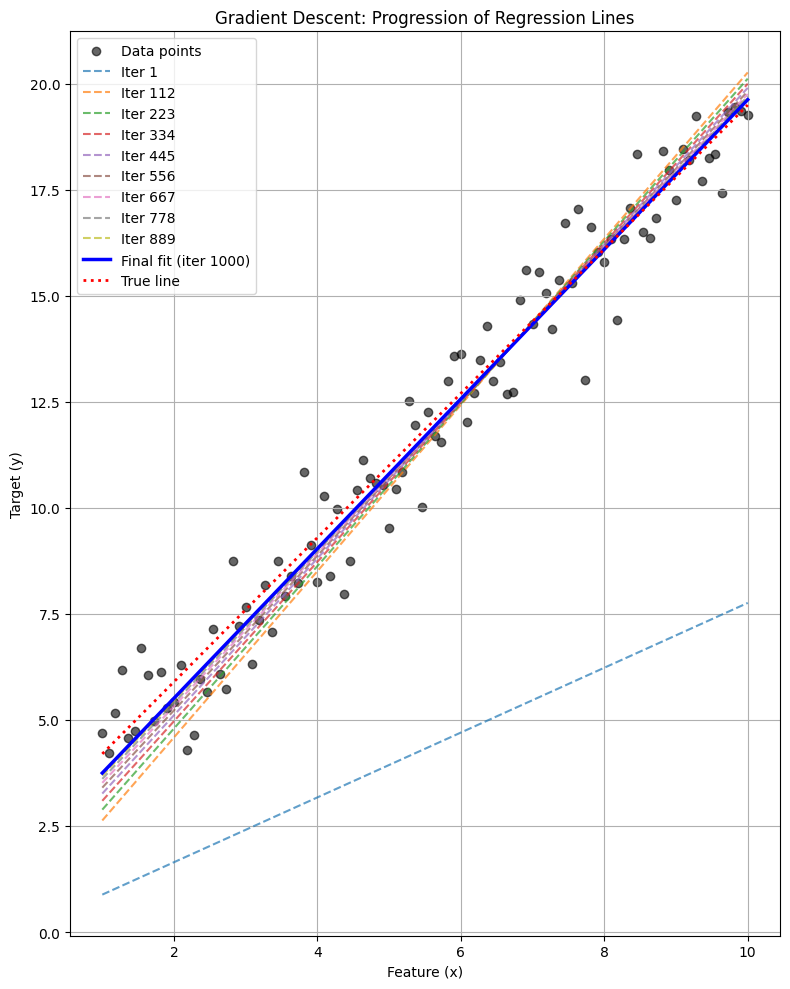

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, iterations: int):
    m, n = X.shape
    y = y.reshape(-1, 1)
    theta = np.zeros((n, 1))
    theta_history = []  # store theta values

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (X.T @ errors) / m
        theta -= alpha * gradient

        # Save theta at each iteration
        theta_history.append(theta.flatten().copy())

    return np.array(theta_history)



# Generate synthetic dataset

np.random.seed(42)
x_vals = np.linspace(1, 10, 100)
X = np.column_stack((np.ones_like(x_vals), x_vals))
true_intercept, true_slope = 2.5, 1.7
noise = np.random.normal(0, 1, size=100)
y = true_intercept + true_slope * x_vals + noise


# Run gradient descent

theta_history = linear_regression_gradient_descent(X, y, alpha=0.01, iterations=1000)

# Final parameters
intercept, slope = theta_history[-1]


# Visualization

plt.figure(figsize=(8, 10))
plt.scatter(x_vals, y, color="black", alpha=0.6, label="Data points")

# Plot 10 lines from history (including final)
iteration_indices = np.linspace(0, 999, 10, dtype=int)

for idx in iteration_indices:
    intercept_i, slope_i = theta_history[idx]
    y_line = intercept_i + slope_i * x_vals
    if idx == iteration_indices[-1]:
        plt.plot(x_vals, y_line, color="blue", linewidth=2.5,
                 label=f"Final fit (iter {idx+1})")
    else:
        plt.plot(x_vals, y_line, linestyle="--", alpha=0.7,
                 label=f"Iter {idx+1}")

# Plot the true line (no noise)
y_true = true_intercept + true_slope * x_vals
plt.plot(x_vals, y_true, color="red", linestyle=":", linewidth=2, label="True line")

plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Gradient Descent: Progression of Regression Lines")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()